In [ ]:
print("hello")

In [ ]:
!pip install langchain_classic

In [ ]:
# Import the necessary modules for handling environment variables and for working with LangChain.
from dotenv import load_dotenv

#from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI
#from langchain import LLMChain
from langchain_classic.chains import LLMChain

from langchain_core.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)



In [ ]:

# First things first, let's load up the environment variables. 
# Why do we do this? Well, it's a best practice to keep sensitive information like API keys out of our code. 
# This way, we can share our code freely without worrying about exposing our secrets. 
# In our case, we'll be using an API key from OpenAI, which we'll load in the next steps.
load_dotenv()


In [ ]:
# We're going to use the gpt-3.5-turbo model from OpenAI, and we're setting the temperature to 0. 
# Temperature affects the randomness of the AI's responses. A temperature of 0 makes the output completely deterministic, 
# providing the same output every time for a given input.
myllm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)


In [ ]:

# The system message acts as the initial instruction for the AI. It sets the context for the conversation. 
# In our case, the AI is a helpful assistant that translates English to California surfer slang.
system_message_prompt = SystemMessagePromptTemplate.from_template("You are a helpful assistant that translates English to California surfer slang.")

# We then add an example of a human message and an AI message. These are just examples to guide the AI in the conversation.
example_human = HumanMessagePromptTemplate.from_template("Hi")
example_ai = AIMessagePromptTemplate.from_template("What's up, dude?")

example_human1 = HumanMessagePromptTemplate.from_template("hey")
example_ai1 = AIMessagePromptTemplate.from_template("wazzup buudy?")


# We also specify a template for future human messages. In this case, it's just the text of the message.
human_message_prompt = HumanMessagePromptTemplate.from_template(" {text} I love programming.")

# We then create a chat prompt from all these templates. The chat prompt is what we will use to guide the AI in the conversation.
chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, example_human, example_ai, example_human1, example_ai1, human_message_prompt])

# We create a LangChain with our chat model and our chat prompt.
chain = LLMChain(llm=myllm, prompt=chat_prompt )

# Finally, we run our chain with an example input, and print the result. In this case, the input is "I love programming."
# The AI will respond based on the templates we've given it and the input it receives.
print(chain.invoke("hey"))

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_classic.chains import LLMChain
#from langchain.llms import OpenAI
from langchain_openai import ChatOpenAI

prompt = PromptTemplate(template="Question: {question}\nAnswer:", input_variables=["question"])
llm = ChatOpenAI(model_name="gpt-4.1", temperature=.95)
chain = LLMChain(llm=llm, prompt=prompt)

output = chain.run("I am creating a character for a science fiction RPG, can you give me three possible names and short backstories for my character?")
print(output)

##### In LangChain, both PromptTemplate and ChatPromptTemplate are used to create reusable templates for generating prompts for language models, but they are designed for different types of interactions:
PromptTemplate:
Purpose: Primarily designed for generating single, standalone prompts for traditional Large Language Models (LLMs) that expect a single string input.
Structure: Typically a simple string template with placeholders for dynamic values.


In [ ]:
from langchain_core.prompts import PromptTemplate

template = "Tell me a {adjective} joke about {topic}."
prompt = PromptTemplate(input_variables=["adjective", "topic"], template=template)
formatted_prompt = prompt.format(adjective="funny", topic="cats")
# Output: "Tell me a funny joke about cats."

llm = ChatOpenAI(model_name="gpt-4.1", temperature=.95)

response = llm.invoke(formatted_prompt)
print(response)

#### ChatPromptTemplate:
Purpose: Specifically designed for creating structured prompts for chat-based models (ChatModels) that expect a list of messages, each with a defined role (e.g., system, human, AI).
Structure: Composed of a list of MessagePromptTemplate objects (like SystemMessagePromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate), which allow for role-based message construction. It can also include MessagesPlaceholder to dynamically insert chat history.

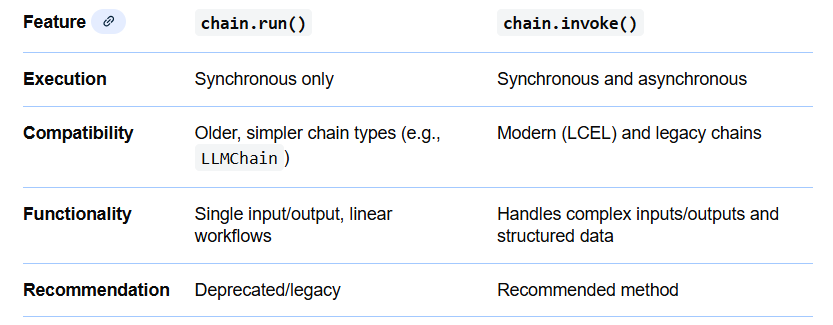

In [ ]:
# 
from langchain_classic.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# simple template that accepts a single input variable so all call styles work with "hello"
template = "You are a helpful assistant. Respond concisely to: {text}"
prompt = PromptTemplate(input_variables=["text"], template=template)

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
chain = LLMChain(llm=llm, prompt=prompt)

# call the chain three different ways and print each output
# out_call = chain("hello")
# print("chain('hello') ->", out_call)

out_run = chain.run("hello")
print("chain.run('hello') ->", out_run)

out_invoke = chain.invoke("hello")
print("chain.invoke('hello') ->", out_invoke)
# ...existing code...